# Plotting and analysis of scalar fields - topography

In [ ]:
# This is a code cell without any tag. You can put convenience code here,
# but it won't be included in any way in the final project.
# For example, to be able to run tests locally in the notebook
# you need to install the following:
# pip install nose
# pip install git+https://github.com/datacamp/ipython_nose
# and then load in the ipython_nose extension like this:
%load_ext ipython_nose

## 1a. Arthur's Seat: Load and plot the topographic data

File `datasets\ArthursSeat.txt` contains elevations in metres on an 800×800 grid with 2 m horizontal spacing for Edinburgh's Carboniferous volcano - Arthur's Seat. The data is stored in a file with 800 lines each of which has 800 elevations on each line.

Let's start by loading and plotting this image.

- Start by reading the elevation file into an array $z$ . Given that the data within the file is already organised within a grid, we can just call `loadtxt` with the file name. 
- We can plot the elevation data using `plt.imshow(z)`, but there are several things that we will want to change about this default map.
- To have a colour bar beside the map, add `cbar = plt.colorbar(shrink=2)`. The default value of 1 for the shrink keyword argument gives a bar which is taller than the map in this case; find a value < 1 that will make the bar close to the same height as the map.
- Having assigned a name to the colour bar object, there are several methods that can modify it. Use the `set_label()` method with a text string to label the bar, e.g. `cbar.set_label('Elevation (m)')`, and use `cbar.set_ticks(list)` with a list of numbers to set the locations of tick marks on the bar.
- Add a title to the plot using `plt.title('A good title')`

<hr>

## Good to know

- <a href="http://www.imagexd.org/tutorial/lessons/0_images_are_arrays.html">Images as numpy arrays</a>
- <a href="https://matplotlib.org/users/image_tutorial.html">More broad application to image analysis and processing</a>

HINTS

In [ ]:
%matplotlib inline

# import the NUMericalPYthon and plotting packages
import numpy as np
import matplotlib.pyplot as plt

# Load the data
z = np.loadtxt(___)

# Plot the elevation data
plt.imshow(___)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z=np.loadtxt('datasets/ArthursSeat.txt')

plt.imshow(z)

cbar = plt.colorbar(shrink=1)
cbar.set_label('Elevation (m)')
plt.title('Arthurs seat elevation')


# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'


In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 1b. Arthur's Seat: Orientating and scaling the map


If you are familiar with Arthur's Seat in Edinburgh, you will realise that the image is flipped in the north-south direction. Note that the numbers on the $y$ axis are in reverse order. 

This is because the convention for storing images (i.e. a digital photograph will be shown correctly) is to store the top-right pixel first. This can be corrected for map axes with an origin in the lower left corner by adding keyword argument `origin='lower'` to the `imshow` command.

We will also do several other corrections to improve the presentation of this map.

In this task we will look at how to orientate and scale the image appropriately.

- Add keyword argument `origin='lower'` to the `imshow()` command inside the brackets and separated from the other arguments using a comma.
- Keyword argument `cmap` in `plt.imshow()` selects the colour map. We can convert it to a greyscale using `cmap='gray'`. Experiment with the Matplotlib colour maps listed at <a href="http://matplotlib.org/examples/color/colormaps_reference.html">Matplotlib colormaps refrence</a> (and see also  <a href="http://matplotlib.org/users/colormaps.html">Matplotlibs colormaps</a>) to find ones that you think are particularly good or bad for showing this data.
- The axes are labelled in grid coordinates (numbers of points) rather than geographical coordinates. The correct extents of the axes ($800 × 2 = 1600$ m) can be set with `imshow` with keyword argument `extent=[0,1600,0,1600]`. Use `plt.xticks()` and `plt.yticks()` if you want to control where the axis tick marks are placed and how they are labelled.


This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [9]:
# Copy your previous solution and use the instructions to build on it


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z=np.loadtxt('datasets/ArthursSeat.txt')

plt.imshow(z,origin='lower',cmap='gray',extent=[0,1600,0,1600])

cbar = plt.colorbar(shrink=1)
cbar.set_label('Elevation (m)')
cbar.set_ticks([50,100,150,200])
plt.title('Arthurs seat elevation')

like_this = 'missing part filled in'

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 1c. Arthur's Seat: Extract the EW and NS gradient components

Given the topographic map (which is a scalar field), we can extract the gradients in the EW and NS directions by applying the gradient operator - this is done with `np.gradient()`.

In this task, you will calculate and plot maps of the NS and EW gradients using `np.gradient()`. 

- Set `dx` to be the grid spacing in meters.
- Pass the elevation data and the grid spacing to `np.gradient`

<hr>

Note that `np.gradient` returns two variables; a map of the NS gradients and a map of the EW gradients. These have been set to `dzdy` and `dzdx` respectively.

- You can find out more about the gradient function by running `?np.gradient` in an empty cell. Cells can be added using the + button in the toolbar above.
- Alternatively, look at the help page online <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html">Numpy Gradient</a>. 
- The examples near the bottom of the help pages are particularly useful.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [1]:
# Specify the grid width
dx = ___

# note there are 2 return values for gradient()
dzdy, dzdx = np.gradient(___, ___)

# this means we now write to figure 2 when we plot
plt.figure(2,figsize=(18,18))

# Plot the EW slopes
plt.subplot(2,1,1)
plt.imshow(dzdx, origin='lower', cmap='jet', extent=[0,1600,0,1600], vmin=-.5, vmax=.5)
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar = plt.colorbar(shrink=1,orientation='horizontal')
cbar.set_label('eastward slope')
cbar.set_ticks([-.5,0,.5])

# Plot the NS slopes
plt.subplot(2,1,2)
plt.imshow(dzdy,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=-.5,vmax=.5)
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar = plt.colorbar(shrink=1,orientation='horizontal')
cbar.set_label('northward slope')
cbar.set_ticks([-.5,0,.5])



NameError: name 'np' is not defined

In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 1d. Arthur's Seat: Calculate and plot a map of the slope angles

The gradient function returned arrays the EW and NS slopes. We can use Pythagarous to calculate the slope in the steepest direction.

The task instructions start with a brief sentence framing the task.

- Use Pythagarous to combine the EW and NS slopes to find the slope in the steepest direction
- Use `np.rad2deg()` to convert this slope to an angle in the unit of degrees
- Plot a map of the slope angle


<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [ ]:
# hillslope magnitude calculated using Pythagarous
slope = ___

# hillslope angle -- degrees above or below horizontal
slopeangle = np.___(np.___(___))

plt.imshow(slopeangle,origin='lower',cmap='jet',extent=[0,1600,0,1600])
plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('slope angle')

In [ ]:
# hillslope magnitude calculated using Pythagarous
slope = np.sqrt(dzdx**2 + dzdy**2)

# hillslope angle -- degrees above or below horizontal
slopeangle = np.rad2deg( np.arctan(slope) )

# plot the slope map using imshow
plt.imshow(slopeangle,origin='lower',cmap='jet',extent=[0,1600,0,1600])
plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('slope angle')

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 1e. Arthur's Seat: Calculate and plot the slope orientations

We can also use the magnitude of the NS and EW slope components to calculate the geographic orientation of the steepest slope direction.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [ ]:
# steepest descent direction -- degrees left of east
#                            -- ranges from -180 to 180
# NOTE: do not convert to degrees if you wish to use a rose diagram
slopedirection = np.rad2deg( np.arctan2(-dzdy,-dzdx) )

# converts "left of east" to "right of north" (clockwise)
slopedirection=90-slopedirection

# Above ranges from -90 to 270 -- but we want 0 to 360
# all angles less than zero: add 360o through BOOLEAN INDEXING
# TRY COMMENTING THIS LINE AND SEE HOW IT CHANGES THE FIGURE
slopedirection[slopedirection<0] = slopedirection[slopedirection<0]+360

plt.imshow(slopedirection,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=0,vmax=360)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_ticks([0,90,180,270,360])
cbar.set_label('steepest descent direction')
# note 2 different colors correspond to North
# this is why rose diagrams are good for showing angular data!
cbar.set_ticklabels(['N','E','S','W','N'])



In [ ]:
# steepest descent direction -- degrees left of east
#                            -- ranges from -180 to 180
# NOTE: do not convert to degrees if you wish to use a rose diagram
slopedirection = np.rad2deg(np.arctan2(-dzdy,-dzdx))

# converts "left of east" to "right of north" (clockwise)
slopedirection=90-slopedirection

# Above ranges from -90 to 270 -- but we want 0 to 360
# all angles less than zero: add 360o through BOOLEAN INDEXING
# TRY COMMENTING THIS LINE AND SEE HOW IT CHANGES THE FIGURE
slopedirection[slopedirection<0] = slopedirection[slopedirection<0]+360

plt.imshow(slopedirection,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=0,vmax=360)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_ticks([0,90,180,270,360])
cbar.set_label('steepest descent direction')
# note 2 different colors correspond to North
# this is why rose diagrams are good for showing angular data!
cbar.set_ticklabels(['N','E','S','W','N'])


# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 1f. Arthur's Seat: Plot a rose diagram of slope directions

## 1g. Arthur's Seat: Make histograms of the slope angles

Context / background / story / etc. This will show up in the student's notebook. It should at most have 800 characters and/or 3 paragraphs.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [ ]:
slopehigher = slopeangle[z>=100]
slopelower = slopeangle[z<100]

plt.subplot(1,2,1)
plt.hist(slopelower)
plt.xlabel('slope angle ($^{\circ}$)')
plt.title('pixels below 100m elev')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.hist(slopehigher)
plt.title('pixels above 100m elev')
plt.xlabel('slope angle ($^{\circ}$)')
plt.ylabel('count')


In [ ]:
slopehigher = slopeangle[z>=100]
slopelower = slopeangle[z<100]
plt.subplot(1,2,1)
plt.hist(slopelower)
plt.xlabel('slope angle ($^{\circ}$)')
plt.title('pixels below 100m elev')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.hist(slopehigher)
plt.title('pixels above 100m elev')
plt.xlabel('slope angle ($^{\circ}$)')
plt.ylabel('count')

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 6. Here goes the title of the sixth task (<= 55 chars)

finally -- see what happens when we change slope angle by 360

Result is physically meaningless but demonstrates effect of boolean indexing

We need to create a new variable as modifying slopeangle will modify above figures
This is a peculiarity of python and plot.show() -- plots have not actually been drawn yet and changing arrays of plots above will have effects

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [ ]:
slopeangle2 = slopeangle
slopeangle2[z>=100]=slopeangle2[z>=100]+360
plt.figure(4)
plt.imshow(slopeangle,origin='lower',cmap='jet',extent=[0,1600,0,1600])
plt.colorbar()


In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 2. Mount St. Helens Topography

Let's switch location and resuse some of the code you develped above to present the topography of Mnt. St.Helens.

- Load the file "datasets/MtStHelens.txt" which is a DEM of Mount St Helens on an 800×800 point grid with 20 m horizontal spacing. 
- Copy the relevant code from above and modify it to visualise the topographic map.
- Give the plot a suitable title and scale the domain appropriately.
- Set suitable tick labels for the colorscale. 

- In order to inform your choice of tick labels, you can find the minimum and maximum elevations using `z.min()` and `z.max()`.

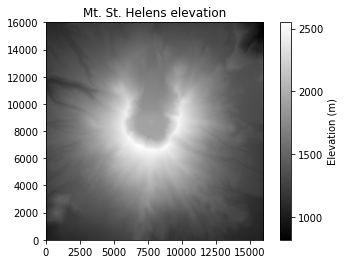

In [7]:
# Copy appropriate code from above and modify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z=np.loadtxt('datasets/MtStHelens.txt')

plt.imshow(z,origin='lower',cmap='gray',extent=[0,1600,0,1600])

cbar = plt.colorbar(shrink=1)
cbar.set_label('Elevation (m)')
cbar.set_ticks([50,100,150,200])
plt.title('Mt. St. Helens elevation')

like_this = 'missing part filled in'

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 3. Analysis of Pressure and Wind Speed Maps

Files `Psurf.txt`, `Uwind.txt` and `Vwind.txt` also sit in the dataset folder. They contain forecasts of surface pressure (hPa) and westerly and southerly components of the wind (m s$^{-1}$) at 10 m height over the North Atlantic on 1 September 2010.

Let's make a single plot showing wind speed with colours, pressure with contours (isobars) and vectors to show the wind-velocity.

- Load the data-files
- Calculate the speed in each cell using Pythagorous
- Contour the pressure data
- If you have named the arrays holding the westerly and southerly wind vector components `u` and `v`, wind vector arrows can be simply added to the plot by `plt.quiver(u,v)`
- Add sensible labels to complete the image
- If you know a little meteorology, you will be able to check that the relationship between the isobars and the wind vectors makes sense


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata

# Load pressure data
P = np.loadtxt(___)

# Load EW and NS wind speeds
u = np.loadtxt(___)
v = np.loadtxt(___)

# Calculate the total speed using pythagarous
speed = ___

# Plot the image of wind-speeds
plt.imshow(___, origin='lower',cmap='jet')
cbar = plt.colorbar(shrink=1)

# Add contours of pressure
cs = plt.contour(___ , colors='black')
plt.clabel(cs, fmt='%d')

# Add vectors of wind velocity
plt.quiver(___, ___)

# Tidy the labelling of the image
cbar.set_label(___)
cbar.set_ticks([___,___,___,___])
plt.title(___)

OSError:  not found.

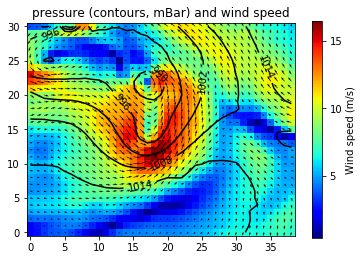

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata

# Load pressure data
P = np.loadtxt('datasets/Psurf.txt')

# Load EW and NS wind speeds
u = np.loadtxt('datasets/Uwind.txt')
v = np.loadtxt('datasets/Vwind.txt')

# Calculate the total speed using pythagarous
speed = np.sqrt(u**2 + v**2)

# Plot the image of wind-speeds
plt.imshow(speed, origin='lower',cmap='jet')
cbar = plt.colorbar(shrink=1)

# Add contours of pressure
cs = plt.contour(P,colors='black')
plt.clabel(cs, fmt='%d')

# Add vectors of wind velocity
plt.quiver(u,v)

# Tidy the labelling of the image
cbar.set_label('Wind speed (m/s)')
cbar.set_ticks([0,5,10,15])
plt.title('pressure (contours, mBar) and wind speed')